In [25]:
!wget -O dataset.zip "https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&e=1&st=p4j69f33&dl=0"

--2024-12-19 21:16:30--  https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&e=1&st=p4j69f33&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc47bca35d8eca41f22f978fbe57.dl.dropboxusercontent.com/cd/0/inline/Cglk3AmZJXRjI_e7HpTdKJB0PXpGoBs0OmopJaR_V2bUrqc5wIivp3xvIIzg0lVhGur3By0lLkX9-7-kZwPV2hsej12fOzfURQPqAQumENUceL7RrjuQEsZoj2htfdeSftexpeQM0mtnfHdpKBWh_Fw2/file# [following]
--2024-12-19 21:16:31--  https://uc47bca35d8eca41f22f978fbe57.dl.dropboxusercontent.com/cd/0/inline/Cglk3AmZJXRjI_e7HpTdKJB0PXpGoBs0OmopJaR_V2bUrqc5wIivp3xvIIzg0lVhGur3By0lLkX9-7-kZwPV2hsej12fOzfURQPqAQumENUceL7RrjuQEsZoj2htfdeSftexpeQM0mtnfHdpKBWh_Fw2/file
Resolving uc47bca35d8eca41f22f978fbe57.dl.dropboxusercontent.com (uc47bca35d8eca41f22f978fbe57.dl.dropboxusercontent.com)... 16

In [26]:
!ls -lh dataset.zip
!file dataset.zip

-rw-r--r-- 1 root root 2.3M Dec 19 21:16 dataset.zip
dataset.zip: Zip archive data, at least v2.0 to extract, compression method=deflate


In [27]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: train/Happy/images (34).jpg  
  inflating: train/Happy/images (29).jpg  
  inflating: train/Neutral/images (39).jpg  
  inflating: train/Happy/images (19).jpg  
  inflating: train/Happy/images (22).jpg  
  inflating: train/Happy/images (32).jpg  
  inflating: train/Happy/images (27).jpg  
  inflating: train/Happy/images (33).jpg  
  inflating: train/Happy/images (28).jpg  
  inflating: train/Neutral/images (41).jpg  
  inflating: train/Happy/images (31).jpg  
  inflating: train/Happy/images (14).jpg  
  inflating: train/Happy/images (20).jpg  
  inflating: train/Happy/images (13).jpg  
  inflating: train/Happy/images (16).jpg  
  inflating: train/Neutral/images (42).jpg  
  inflating: train/Happy/images (21).jpg  
  inflating: train/Happy/images (24).jpg  
  inflating: train/Happy/images (35).jpg  
  inflating: train/Happy/images (18).jpg  
  inflating: train/Neutral/images (44).jpg  
  inflating: train/Happy/images (30).jpg  
  inflating: train/Happy

In [2]:
# Upgrade TensorFlow and Keras
!pip install --upgrade tensorflow keras

# Import necessary modules
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.losses import categorical_crossentropy

# Your code here


#  Building our Model To train the data

In [3]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [9]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [7]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

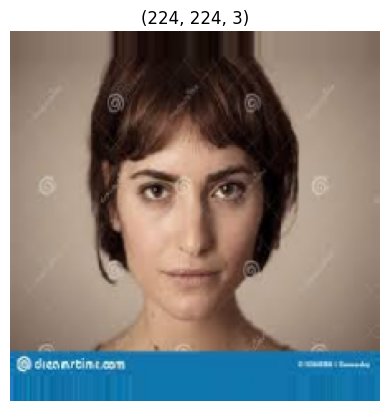

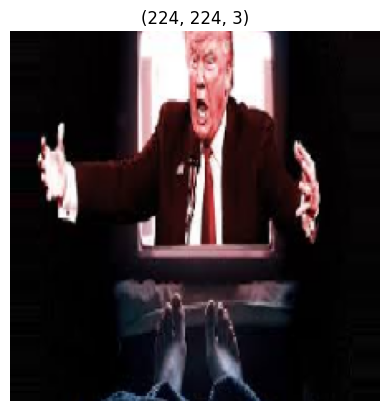

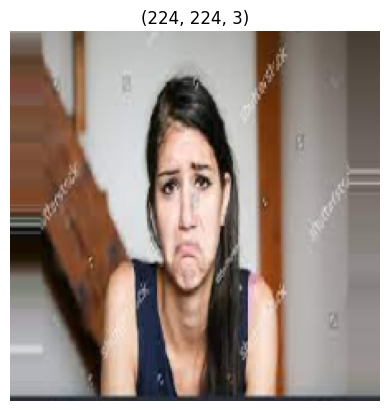

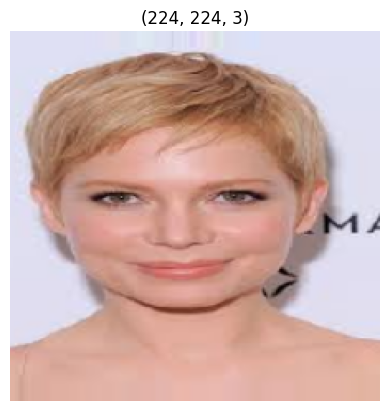

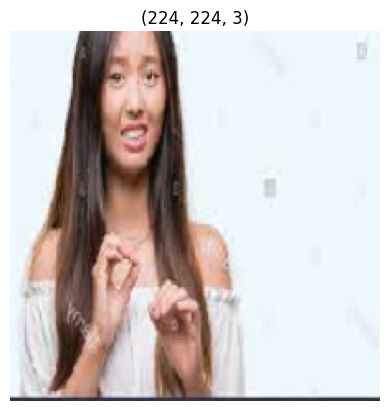

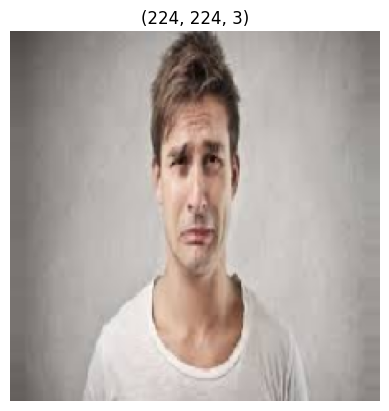

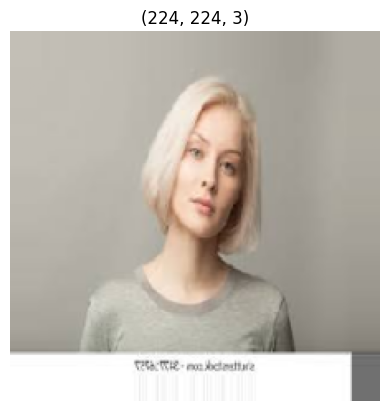

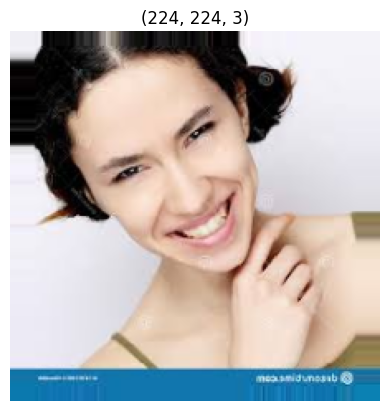

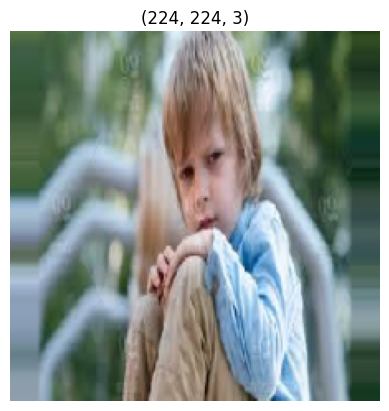

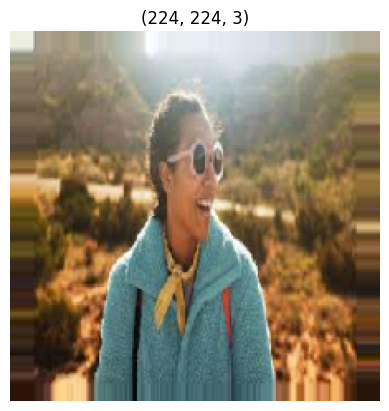

In [13]:
# to visualize the images in the training data generator
t_img, label = next(train_data)

#-----------------------------------------------------------------------------
# function when called will plot the images
def plotImages(img_arr, label):
    """
    input :- images array
    output :- plots the images
    """
    count = 0
    for im, l in zip(img_arr, label):
        plt.imshow(im)
        plt.title(im.shape)
        plt.axis(False)
        plt.show()
        count += 1
        if count == 10:
            break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)


# having early stopping and model check point

In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

# Model checkpoint
mc = ModelCheckpoint(filepath="best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Putting callback in a list
call_back = [es, mc]


In [17]:
hist = model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_data,
    validation_steps=8,
    callbacks=[es, mc]
)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - accuracy: 0.1909 - loss: 8.8312
Epoch 1: val_accuracy improved from -inf to 0.58984, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.1941 - loss: 8.8533 - val_accuracy: 0.5898 - val_loss: 2.7608
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3125 - loss: 6.3824

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.58984 to 0.62891, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.3125 - loss: 6.3824 - val_accuracy: 0.6289 - val_loss: 2.6484
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.5866 - loss: 2.9711
Epoch 3: val_accuracy improved from 0.62891 to 0.75781, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 534ms/step - accuracy: 0.5890 - loss: 2.9592 - val_accuracy: 0.7578 - val_loss: 1.2829
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7667 - loss: 1.7429
Epoch 4: val_accuracy improved from 0.75781 to 0.82031, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.7667 - loss: 1.7429 - val_accuracy: 0.8203 - val_loss: 0.8560
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.7992 - loss: 0.9777
Epoch 5: val_accuracy improved from 0.82031 to 0.91406, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 464ms

In [18]:

# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.keras")

In [19]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

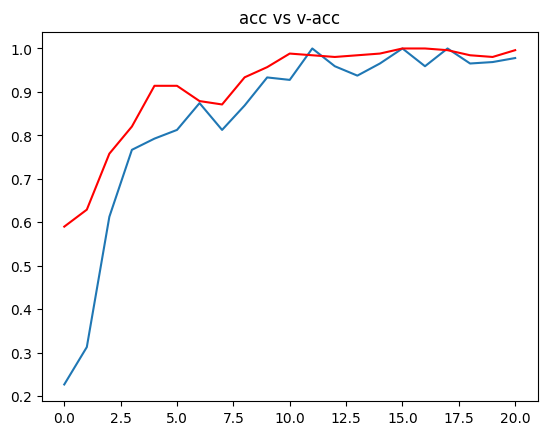

In [20]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

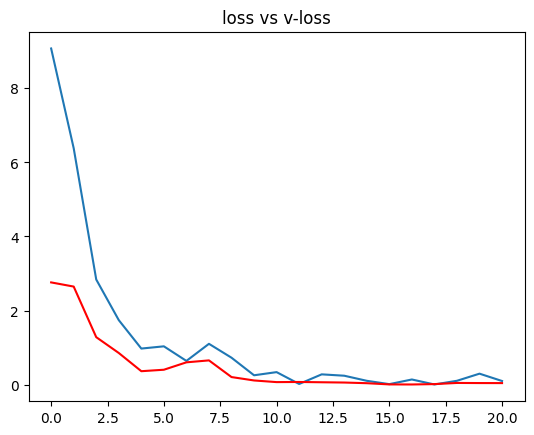

In [21]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [22]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
 the image is of Angry


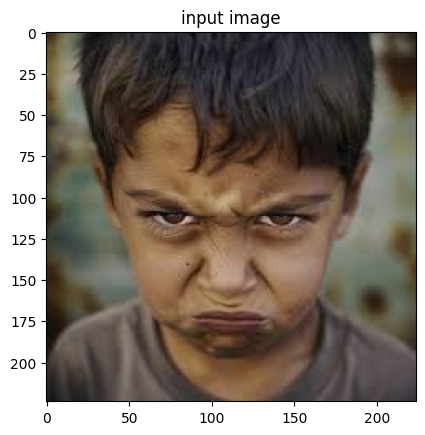

In [24]:
# path for the image to see if it predics correct class

path = "/content/angry.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()